# 🛒 Missing Data Handling - E-Commerce Analytics Case Study

**Real-World Scenario:** You're a data analyst at **ShopSmart**, a growing e-commerce platform in Southeast Asia. Your manager has asked you to analyze customer data to improve marketing strategies, but you've discovered that the customer database has missing information. You need to clean the data before you can provide meaningful insights.

**Learning Objective:** Learn how to handle missing data in a real e-commerce customer dataset to enable accurate business analysis.

## Prerequisites



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




---

## 🔍 STEP 1: Understanding Our E-Commerce Data Problem

### Q1.1: You've just received the customer database from ShopSmart's IT team. Some cells are empty - what does this mean for your analysis?

**Answer:** Empty cells indicate missing customer information that could impact our marketing insights and business decisions.

**Real-World Impact:**
- **Marketing campaigns** might target wrong demographics
- **Revenue projections** could be inaccurate
- **Customer segmentation** would be flawed
- **Personalization efforts** might fail

Let's examine ShopSmart's actual customer data:



In [3]:
# ShopSmart's customer database (anonymized sample)
customer_data = {
    'customer_id': ['CUST001', 'CUST002', 'CUST003', 'CUST004', 'CUST005', 'CUST006', 'CUST007', 'CUST008'],
    'name': ['Ahmad Rahman', 'Siti Nurhaliza', 'John Tan', 'Mei Lin', 'David Wong', 'Sarah Lim', 'Raj Kumar', 'Lisa Chen'],
    'age': [28, None, 35, 22, 41, None, 29, 33],  # Some customers didn't provide age
    'phone': ['+60123456789', None, '+65987654321', '+6281234567', None, '+6391234567', '+66123456789', None],  # Privacy concerns
    'monthly_income': [4500, 6200, np.nan, 3800, 8500, 5400, np.nan, 7200],  # Sensitive financial data
    'city': ['Kuala Lumpur', 'Penang', None, 'Singapore', 'Bangkok', 'Manila', 'Jakarta', 'Ho Chi Minh'],
    'total_orders': [15, 8, 23, 5, 31, 12, None, 18],  # System integration issues
    'avg_order_value': [250.50, 180.75, 320.25, 95.00, 480.30, 200.15, 165.80, None],  # Data sync problems
    'membership_tier': ['Gold', 'Silver', 'Platinum', 'Bronze', None, 'Silver', 'Gold', 'Gold']  # New customer, not yet assigned
}

df = pd.DataFrame(customer_data)
print("ShopSmart Customer Database:")
df


ShopSmart Customer Database:


,customer_id,name,age,phone,monthly_income,city,total_orders,avg_order_value,membership_tier
0,CUST001,Ahmad Rahman,28.0,+60123456789,4500.0,Kuala Lumpur,15.0,250.50,Gold
1,CUST002,Siti Nurhaliza,NaN,None,6200.0,Penang,8.0,180.75,Silver
2,CUST003,John Tan,35.0,+65987654321,NaN,None,23.0,320.25,Platinum
3,CUST004,Mei Lin,22.0,+6281234567,3800.0,Singapore,5.0,95.00,Bronze
4,CUST005,David Wong,41.0,None,8500.0,Bangkok,31.0,480.30,None
5,CUST006,Sarah Lim,NaN,+6391234567,5400.0,Manila,12.0,200.15,Silver
6,CUST007,Raj Kumar,29.0,+66123456789,NaN,Jakarta,NaN,165.80,Gold
7,CUST008,Lisa Chen,33.0,None,7200.0,Ho Chi Minh,18.0,NaN,Gold




**Business Impact:** This missing data could lead to:
- **Incorrect customer segmentation** for targeted promotions
- **Failed SMS marketing campaigns** (missing phone numbers)
- **Inaccurate revenue forecasting** (missing order data)
- **Poor geographical expansion decisions** (missing city data)

### Q1.2: How does our e-commerce system represent these missing customer details?

**Answer:** As NaN (Not a Number) or None, which are pandas' ways of indicating missing information.

**Technical Context:**
- **NaN**: Used for numerical data (income, order values)
- **None**: Used for text data (phone numbers, cities)
- **Both**: Treated as missing by pandas analytics functions



In [3]:
print("Understanding our data types:")
print(f"Monthly income (numeric): NaN represents missing financial data")
print(f"Phone numbers (text): None represents customers who declined to share")
print(f"Both are treated as missing values in our analysis")


Understanding our data types:
Monthly income (numeric): NaN represents missing financial data
Phone numbers (text): None represents customers who declined to share
Both are treated as missing values in our analysis




---

## 🔍 STEP 2: Assessing Data Quality for Business Decisions

### Q1.3: As ShopSmart's analyst, how can you quickly identify which customer records have missing information?

**Answer:** Use `isnull()` to create a "missing data map" showing exactly where information is incomplete.



In [4]:
print("ShopSmart Missing Data Analysis:")
missing_map = df.isnull()
missing_map

ShopSmart Missing Data Analysis:


,customer_id,name,age,phone,monthly_income,city,total_orders,avg_order_value,membership_tier
0,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,True
5,False,False,True,False,False,False,False,False,False
6,False,False,False,False,True,False,True,False,False
7,False,False,False,True,False,False,False,True,False




**Business Insight:** Each `True` represents a data gap that could impact specific business operations.

### Q1.4: Your marketing manager needs to know: "How many customers are we missing key information from?"

**Answer:** Use `.isnull().sum()` to count missing values per customer attribute.



In [5]:
missing_counts = df.isnull().sum()
print("Missing Customer Information Summary:")
print(missing_counts)


Missing Customer Information Summary:
customer_id        0
name               0
age                2
phone              3
monthly_income     2
city               1
total_orders       1
avg_order_value    1
membership_tier    1
dtype: int64


In [ ]:
print("\nBusiness Impact Analysis:")
for col, count in missing_counts.items():
    if count > 0:
        percentage = (count / len(df)) * 100
        print(f"  - {col}: {count} customers ({percentage:.1f}%) - Impact: ", end="")
        
        # Business impact assessment
        if col == 'phone':
            print("Cannot send SMS promotions")
        elif col == 'monthly_income':
            print("Cannot segment by purchasing power")
        elif col == 'city':
            print("Cannot target location-based offers")
        elif col == 'total_orders':
            print("Cannot identify loyal customers")
        elif col == 'avg_order_value':
            print("Cannot calculate customer lifetime value")
        elif col == 'membership_tier':
            print("Cannot apply tier-specific benefits")



Business Impact Analysis:
  - age: 2 customers (25.0%) - Impact:   - phone: 3 customers (37.5%) - Impact: Cannot send SMS promotions
  - monthly_income: 2 customers (25.0%) - Impact: Cannot segment by purchasing power
  - city: 1 customers (12.5%) - Impact: Cannot target location-based offers
  - total_orders: 1 customers (12.5%) - Impact: Cannot identify loyal customers
  - avg_order_value: 1 customers (12.5%) - Impact: Cannot calculate customer lifetime value
  - membership_tier: 1 customers (12.5%) - Impact: Cannot apply tier-specific benefits




### Q1.5: Before presenting to the executive team, you need to answer: "Do we have any data quality issues at all?"

**Answer:** Use `.isnull().values.any()` for a quick yes/no assessment.



In [7]:
data_quality_issues = df.isnull().values.any()
print(f"Does ShopSmart have data quality issues? {data_quality_issues}")

if data_quality_issues:
    total_missing = df.isnull().sum().sum()
    total_data_points = df.shape[0] * df.shape[1]
    missing_percentage = (total_missing / total_data_points) * 100
    
    print(f"\nExecutive Summary:")
    print(f"- Total missing data points: {total_missing}")
    print(f"- Overall data completeness: {100 - missing_percentage:.1f}%")
    print(f"- Requires data cleaning before analysis: YES")
else:
    print("Data is complete and ready for analysis")


Does ShopSmart have data quality issues? True

Executive Summary:
- Total missing data points: 11
- Overall data completeness: 84.7%
- Requires data cleaning before analysis: YES




---

## 🔍 STEP 3: Understanding Why Customer Data Goes Missing

### Q1.6: Your IT manager asks: "Why don't we have complete information for all customers?"

**Answer:** Customer data goes missing due to various real-world business scenarios.

**ShopSmart's Missing Data Scenarios:**

1. **Age missing:** 
   - **Reason:** Customers skip optional fields during registration
   - **Business Context:** Privacy concerns, especially from older demographics

2. **Phone missing:** 
   - **Reason:** Customers worry about marketing calls/SMS spam
   - **Business Context:** Trust issues with new e-commerce platforms

3. **Monthly income missing:** 
   - **Reason:** Highly sensitive financial information
   - **Business Context:** Cultural reluctance to share income data

4. **City missing:** 
   - **Reason:** Technical issues during mobile app registration
   - **Business Context:** Poor UX on mobile checkout flow

5. **Total orders missing:** 
   - **Reason:** System integration problems between old/new databases
   - **Business Context:** Recent platform migration caused data sync issues

### Q1.7: The data science team asks: "Are all these missing values the same type of problem?"

**Answer:** No! Understanding the TYPE of missing data helps determine the best business solution.

#### 📊 Missing Data Types in E-Commerce Context (Beginner-Friendly Explanation)

When we collect data in e-commerce, sometimes values are missing. These missing values are not all the same, they can occur for different reasons. Understanding the type of missing data helps us decide how serious the problem is and what to do about it.

---

**1. MCAR (Missing Completely At Random):**

- **What it means:** The missing values happen randomly, with no relationship to the data itself. It is like flipping a coin, sometimes you lose data, sometimes you don’t, and it doesn’t depend on any customer behaviour or attribute.
- **Example:** A server crash during data backup randomly corrupted some records. Any customer’s data could be affected, and it has nothing to do with their age, income, or behaviour.
- **ShopSmart case:** Some order values are missing because of a payment gateway timeout. The system failed randomly, and it could have happened to anyone.
- **Business impact:** Minimal bias. Since the missingness is random, it doesn’t systematically distort the analysis. The data is still fairly representative of the real-world situation.
- **Solution priority:** **Low.** You can either ignore these missing values if there are few, or use simple methods like filling them with the average (mean) value.

---

**2. MAR (Missing At Random):**

- **What it means:** The missing values depend on some other known information, but not on the missing value itself. If we look at related data, we can explain the pattern of missingness.
- **Example:** Younger customers are less likely to provide phone numbers. The missingness is related to age (a variable we do know) but not directly to the phone number value itself.
- **ShopSmart case:** In ShopSmart’s data, age correlates with willingness to share contact information. For example, customers under 25 often leave the phone number field blank.
- **Business impact:** Manageable if we account for the pattern. If we ignore the missingness, analyses like customer segmentation may be biased (e.g., over-representing older customers).
- **Solution priority:** **Medium.** We need to use techniques like imputation that consider other variables (e.g., filling missing phone numbers differently for different age groups).

---

**3. MNAR (Missing Not At Random):**

- **What it means:** The missing values depend on the value itself. People choose not to provide certain information because of what the value is. This is the hardest case to deal with because the missingness is not random, it is directly related to the thing we want to measure.
- **Example:** High-income customers deliberately don’t report income. The very fact that they are wealthy is the reason they are leaving the field blank.
- **ShopSmart case:** Wealthy customers avoid sharing financial data, which means the dataset could under-represent high-income groups.
- **Business impact:** This can severely bias business decisions. For example, if missing income is linked to high-value customers, you may underestimate how many premium customers you actually have.
- **Solution priority:** **High.** This type of missing data needs careful handling, such as advanced modelling, sensitivity analysis, or even redesigning data collection strategies (e.g., providing incentives to encourage honest reporting).

---

✅ **Summary:**  
- **MCAR**: Random missingness. Not a big issue.  
- **MAR**: Missingness linked to other data. Needs some attention.  
- **MNAR**: Missingness linked to the missing value itself. Very serious and tricky.  




In [8]:
print("ShopSmart Missing Data Pattern Analysis:")
print("\n1. Age vs Phone disclosure pattern:")
age_phone_pattern = df.groupby(df['age'].notnull())['phone'].apply(lambda x: x.notnull().mean())
print(age_phone_pattern)

print("\n2. This suggests MAR pattern - age affects phone disclosure willingness")


ShopSmart Missing Data Pattern Analysis:

1. Age vs Phone disclosure pattern:
age
False    0.500000
True     0.666667
Name: phone, dtype: float64

2. This suggests MAR pattern - age affects phone disclosure willingness




---

## 🔍 STEP 4: Business Strategies for Handling Missing Customer Data

### Q1.8 & Q1.9: Your manager asks: "What are our options for dealing with incomplete customer records?"

**Answer:** 
1. **Remove incomplete customer records** (lose customers from analysis)
2. **Estimate missing information** (fill in reasonable values)

Let's see the business impact of removing incomplete records:



In [9]:
print("ShopSmart Customer Database Analysis:")
print(f"Original customer count: {df.shape[0]} customers")
print(f"Original revenue data points: {df.shape[1]} attributes per customer")

# Remove customers with any missing information
complete_customers = df.dropna()
print(f"\nAfter removing incomplete records:")
print(f"Remaining customers: {complete_customers.shape[0]}")
print(complete_customers)

customers_lost = df.shape[0] - complete_customers.shape[0]
customer_loss_percentage = (customers_lost / df.shape[0]) * 100
print(f"\nBusiness Impact:")
print(f"- Lost {customers_lost} customers ({customer_loss_percentage:.1f}% of customer base)")
print(f"- Potential revenue impact: Significant")
print(f"- Analysis reliability: High for remaining customers")


ShopSmart Customer Database Analysis:
Original customer count: 8 customers
Original revenue data points: 9 attributes per customer

After removing incomplete records:
Remaining customers: 2
  customer_id          name   age         phone  monthly_income          city  \
0     CUST001  Ahmad Rahman  28.0  +60123456789          4500.0  Kuala Lumpur   
3     CUST004       Mei Lin  22.0   +6281234567          3800.0     Singapore   

   total_orders  avg_order_value membership_tier  
0          15.0            250.5            Gold  
3           5.0             95.0          Bronze  

Business Impact:
- Lost 6 customers (75.0% of customer base)
- Potential revenue impact: Significant
- Analysis reliability: High for remaining customers




### Q1.10: When should ShopSmart remove incomplete customer records?

**Answer:**
- ✅ **When:** Database has 100,000+ customers and only 50 have missing data
- ✅ **When:** Missing data is from random system glitches (MCAR)
- ✅ **When:** Analysis focuses on complete customer journey mapping
- ❌ **Avoid when:** Small customer base (every customer matters)
- ❌ **Avoid when:** Missing data shows patterns (could bias results)
- ❌ **Avoid when:** Missing info correlates with high-value customers

**Business Rule:** For ShopSmart's current size, losing customers is costly - imputation is preferred.

---

## 🔍 STEP 5: Estimating Missing Customer Information

### Q1.11: What does "imputation" mean in e-commerce analytics?

**Answer:** Filling in missing customer information with reasonable estimates based on similar customers or business logic.



In [10]:
# Create working copy for business analysis
df_business = df.copy()
print("ShopSmart Customer Data - Ready for Imputation:")
print(df_business)


ShopSmart Customer Data - Ready for Imputation:
  customer_id            name   age         phone  monthly_income  \
0     CUST001    Ahmad Rahman  28.0  +60123456789          4500.0   
1     CUST002  Siti Nurhaliza   NaN          None          6200.0   
2     CUST003        John Tan  35.0  +65987654321             NaN   
3     CUST004         Mei Lin  22.0   +6281234567          3800.0   
4     CUST005      David Wong  41.0          None          8500.0   
5     CUST006       Sarah Lim   NaN   +6391234567          5400.0   
6     CUST007       Raj Kumar  29.0  +66123456789             NaN   
7     CUST008       Lisa Chen  33.0          None          7200.0   

           city  total_orders  avg_order_value membership_tier  
0  Kuala Lumpur          15.0           250.50            Gold  
1        Penang           8.0           180.75          Silver  
2          None          23.0           320.25        Platinum  
3     Singapore           5.0            95.00          Bronze  
4    



### Q1.12: How should we handle missing customer ages for demographic analysis?

**Answer:** Use median age to avoid skewing by outliers (very young/old customers).



In [11]:
print("Customer Age Analysis:")
print(f"Current ages: {df_business['age'].dropna().tolist()}")
print(f"Customers with missing age: {df_business['age'].isnull().sum()}")

# Calculate median age for imputation
median_age = df_business['age'].median()
print(f"Median customer age: {median_age} years")

# Business justification
print(f"\nBusiness Logic:")
print(f"- Median represents typical ShopSmart customer")
print(f"- Avoids bias from very young (18) or older (65+) customers")
print(f"- Safe assumption for marketing targeting")

# Apply imputation
df_business['age'] = df_business['age'].fillna(median_age)
print(f"\nAfter age imputation:")
print(f"Updated ages: {df_business['age'].tolist()}")
print(f"Missing ages: {df_business['age'].isnull().sum()}")


Customer Age Analysis:
Current ages: [28.0, 35.0, 22.0, 41.0, 29.0, 33.0]
Customers with missing age: 2
Median customer age: 31.0 years

Business Logic:
- Median represents typical ShopSmart customer
- Avoids bias from very young (18) or older (65+) customers
- Safe assumption for marketing targeting

After age imputation:
Updated ages: [28.0, 31.0, 35.0, 22.0, 41.0, 31.0, 29.0, 33.0]
Missing ages: 0




### Q1.13: Why use median instead of mean for customer age?

**Answer:** Median protects against outliers that could skew marketing strategies.



In [12]:
print("Age Imputation Strategy Comparison:")

# Simulate ages with outliers (example from customer research)
example_ages = [22, 25, 28, 30, 32, 35, 38, 75]  # 75 is an outlier
mean_age = np.mean(example_ages)
median_age_example = np.median(example_ages)

print(f"Customer ages: {example_ages}")
print(f"Mean age: {mean_age:.1f} years")
print(f"Median age: {median_age_example:.1f} years")

print(f"\nBusiness Decision Impact:")
print(f"- Using mean ({mean_age:.1f}): Target 'middle-aged' customers")
print(f"- Using median ({median_age_example:.1f}): Target 'young adults'")
print(f"- Median better represents core customer base")
print(f"- Marketing budget allocated more effectively with median")


Age Imputation Strategy Comparison:
Customer ages: [22, 25, 28, 30, 32, 35, 38, 75]
Mean age: 35.6 years
Median age: 31.0 years

Business Decision Impact:
- Using mean (35.6): Target 'middle-aged' customers
- Using median (31.0): Target 'young adults'
- Median better represents core customer base
- Marketing budget allocated more effectively with median




### Q1.14: How should we handle missing membership tiers for customer service?

**Answer:** Use the most common tier (mode) as a reasonable default for new customers.



In [13]:
print("Membership Tier Analysis:")
print(f"Current tiers: {df_business['membership_tier'].tolist()}")
print(f"Customers with missing tier: {df_business['membership_tier'].isnull().sum()}")

# Analyze tier distribution for business decision
tier_distribution = df_business['membership_tier'].value_counts()
print(f"\nTier Distribution:")
print(tier_distribution)

# Find most common tier
most_common_tier = df_business['membership_tier'].mode()[0]
print(f"\nMost common tier: {most_common_tier}")

print(f"\nBusiness Logic:")
print(f"- New customers typically start at {most_common_tier} level")
print(f"- Provides appropriate service level expectations")
print(f"- Can be upgraded based on future purchase behavior")

# Apply imputation
df_business['membership_tier'] = df_business['membership_tier'].fillna(most_common_tier)
print(f"\nAfter tier imputation:")
print(f"Updated tiers: {df_business['membership_tier'].tolist()}")


Membership Tier Analysis:
Current tiers: ['Gold', 'Silver', 'Platinum', 'Bronze', None, 'Silver', 'Gold', 'Gold']
Customers with missing tier: 1

Tier Distribution:
membership_tier
Gold        3
Silver      2
Platinum    1
Bronze      1
Name: count, dtype: int64

Most common tier: Gold

Business Logic:
- New customers typically start at Gold level
- Provides appropriate service level expectations
- Can be upgraded based on future purchase behavior

After tier imputation:
Updated tiers: ['Gold', 'Silver', 'Platinum', 'Bronze', 'Gold', 'Silver', 'Gold', 'Gold']




### Q1.15: What about missing financial data like monthly income?

**Answer:** Multiple approaches depending on business needs and available data patterns.



In [14]:
print("Advanced Imputation for E-Commerce Analytics:")

# Create transaction history data for time-series imputation
transaction_data = {
    'date': pd.date_range('2024-01-01', periods=10, freq='D'),
    'daily_revenue': [15420, 18950, None, None, 22100, None, 19800, 21300, None, 23450],
    'daily_orders': [45, None, 52, None, None, 61, None, 58, 65, None]
}
df_transactions = pd.DataFrame(transaction_data)
print("Daily Revenue Data (with missing values):")
print(df_transactions)

# Forward fill for revenue (assume steady growth)
df_transactions_ffill = df_transactions.copy()
df_transactions_ffill[['daily_revenue', 'daily_orders']] = df_transactions_ffill[['daily_revenue', 'daily_orders']].fillna(method='ffill')
print("\nForward Fill (assume steady business):")
print(df_transactions_ffill)

# Backward fill for recent trend
df_transactions_bfill = df_transactions.copy()
df_transactions_bfill[['daily_revenue', 'daily_orders']] = df_transactions_bfill[['daily_revenue', 'daily_orders']].fillna(method='bfill')
print("\nBackward Fill (recent trend assumption):")
print(df_transactions_bfill)


Advanced Imputation for E-Commerce Analytics:
Daily Revenue Data (with missing values):
        date  daily_revenue  daily_orders
0 2024-01-01        15420.0          45.0
1 2024-01-02        18950.0           NaN
2 2024-01-03            NaN          52.0
3 2024-01-04            NaN           NaN
4 2024-01-05        22100.0           NaN
5 2024-01-06            NaN          61.0
6 2024-01-07        19800.0           NaN
7 2024-01-08        21300.0          58.0
8 2024-01-09            NaN          65.0
9 2024-01-10        23450.0           NaN

Forward Fill (assume steady business):
        date  daily_revenue  daily_orders
0 2024-01-01        15420.0          45.0
1 2024-01-02        18950.0          45.0
2 2024-01-03        18950.0          52.0
3 2024-01-04        18950.0          52.0
4 2024-01-05        22100.0          52.0
5 2024-01-06        22100.0          61.0
6 2024-01-07        19800.0          61.0
7 2024-01-08        21300.0          58.0
8 2024-01-09        21300.0     



#### Advanced Business-Context Imputation:



In [15]:
print("Business-Logic Based Imputation:")

# Customer income estimation based on spending patterns
print("\nIncome Imputation Strategy:")
for idx, row in df_business.iterrows():
    if pd.isna(row['monthly_income']):
        # Estimate income based on average order value
        if row['avg_order_value'] > 400:
            estimated_income = 8000  # High spender
        elif row['avg_order_value'] > 200:
            estimated_income = 6000  # Medium spender  
        else:
            estimated_income = 4000  # Budget conscious
        
        print(f"Customer {row['name']}: Avg order ${row['avg_order_value']:.2f} → Estimated income ${estimated_income}")


Business-Logic Based Imputation:

Income Imputation Strategy:
Customer John Tan: Avg order $320.25 → Estimated income $6000
Customer Raj Kumar: Avg order $165.80 → Estimated income $4000




### Q1.16: What business risks come with poor imputation decisions?

**Answer:** Wrong estimates can lead to costly business mistakes and lost revenue.



Business Risk Analysis - Imputation Impact:
Original customer incomes: [4500.0, 6200.0, 3800.0, 8500.0, 5400.0, 7200.0]
Mean income: $5933.33
Median income: $5800.00

Business Impact Scenarios:
1. Using Mean ($5933.33):
   - Marketing: Target premium products
   - Risk: Overestimate customer purchasing power
   - Result: High-priced campaigns may fail

2. Using Median ($5800.00):
   - Marketing: Target mid-range products
   - Risk: More conservative, safer approach
   - Result: Better campaign success rates


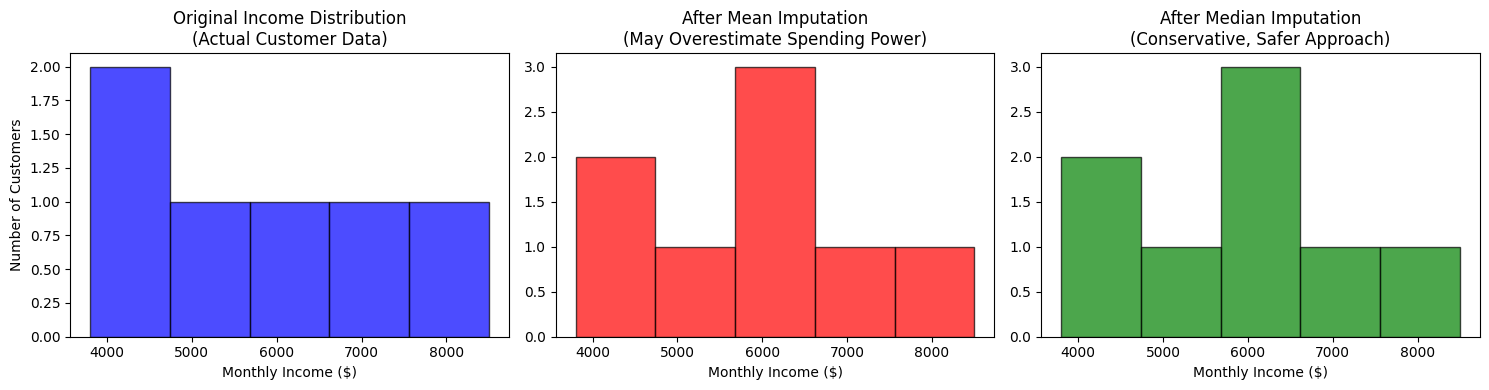


Recommendation: Use median for financial data to avoid overestimating customer spending capacity


In [16]:
print("Business Risk Analysis - Imputation Impact:")

# Compare different income imputation strategies
original_income = df['monthly_income'].dropna()
income_mean = original_income.mean()
income_median = original_income.median()

print(f"Original customer incomes: {original_income.tolist()}")
print(f"Mean income: ${income_mean:.2f}")
print(f"Median income: ${income_median:.2f}")

print(f"\nBusiness Impact Scenarios:")
print(f"1. Using Mean (${income_mean:.2f}):")
print(f"   - Marketing: Target premium products")
print(f"   - Risk: Overestimate customer purchasing power")
print(f"   - Result: High-priced campaigns may fail")

print(f"\n2. Using Median (${income_median:.2f}):")
print(f"   - Marketing: Target mid-range products")
print(f"   - Risk: More conservative, safer approach")
print(f"   - Result: Better campaign success rates")

# Visualize the impact
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original distribution
axes[0].hist(original_income, bins=5, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Original Income Distribution\n(Actual Customer Data)')
axes[0].set_xlabel('Monthly Income ($)')
axes[0].set_ylabel('Number of Customers')

# Mean imputation impact
df_mean_imp = df.copy()
df_mean_imp['monthly_income'] = df_mean_imp['monthly_income'].fillna(income_mean)
axes[1].hist(df_mean_imp['monthly_income'], bins=5, alpha=0.7, color='red', edgecolor='black')
axes[1].set_title('After Mean Imputation\n(May Overestimate Spending Power)')
axes[1].set_xlabel('Monthly Income ($)')

# Median imputation impact
df_median_imp = df.copy()
df_median_imp['monthly_income'] = df_median_imp['monthly_income'].fillna(income_median)
axes[2].hist(df_median_imp['monthly_income'], bins=5, alpha=0.7, color='green', edgecolor='black')
axes[2].set_title('After Median Imputation\n(Conservative, Safer Approach)')
axes[2].set_xlabel('Monthly Income ($)')

plt.tight_layout()
plt.show()

print(f"\nRecommendation: Use median for financial data to avoid overestimating customer spending capacity")




---

## ✅ ShopSmart Data Quality Management Summary

| Business Need | Data Quality Technique | E-Commerce Application |
|---------------|------------------------|-------------------------|
| Identify data gaps | `df.isnull()` | Find customers with incomplete profiles |
| Measure data completeness | `df.isnull().sum()` | Report % of customers ready for campaigns |
| Quick data quality check | `df.isnull().values.any()` | Executive dashboard: "Data ready?" |
| Remove incomplete records | `df.dropna()` | Focus analysis on complete customer journeys |
| Fix missing demographics | `df[col].fillna(df[col].median())` | Age/income for targeted marketing |
| Fix missing categories | `df[col].fillna(df[col].mode()[0])` | Membership tiers for customer service |
| Fix missing time-series | `df.fillna(method="ffill/bfill")` | Daily revenue/order forecasting |
| Assess business impact | Distribution analysis | Ensure marketing budgets target correctly |

---

## 🎯 Key Business Insights for E-Commerce Analytics

### Data Quality Impacts Business Outcomes:

1. **Customer Segmentation Accuracy**
   - Missing demographics = wrong target audiences
   - Poor imputation = wasted marketing spend

2. **Revenue Forecasting Reliability**
   - Missing transaction data = inaccurate projections
   - Wrong imputation = budget planning errors

3. **Personalization Effectiveness**
   - Incomplete customer profiles = generic experiences
   - Better data = higher conversion rates

4. **Operational Efficiency**
   - Clean data = automated marketing workflows
   - Missing data = manual intervention required

### ShopSmart's Data Strategy:

**Immediate Actions:**
- Use median for numerical customer attributes (age, income)
- Use mode for categorical data (membership tier, preferred category)
- Implement forward-fill for daily business metrics
- Never drop customers unless absolutely necessary

**Long-term Improvements:**
- Incentivize complete profile completion (discounts for full profiles)
- Improve mobile UX to reduce data entry abandonment
- Implement data validation at point of entry
- Regular data quality monitoring dashboards